In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


In [2]:
california_csv = "dirty_data/RealEstate_California.csv"
georgia_csv = "dirty_data/RealEstate_Georgia.csv"

california_raw_data = pd.read_csv(california_csv)
georgia_raw_data = pd.read_csv(georgia_csv)

pd.options.display.max_columns = None

In [3]:
california_raw_data

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,state,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,currency,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,CA,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,USD,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,CA,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",USD,1671.0,1671.0,sqft,2.0,3.0,1671.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,CA,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",USD,1414.0,1414.0,Acres,2.0,3.0,1414.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,CA,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,USD,1336.0,1336.0,sqft,2.0,3.0,1336.0,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,CA,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,USD,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35384,35384,90036-20610069,9,130313,12447,USA,2021-06-19,0,0,Listing removed,1.620259e+12,3360000.0,0.0,Los Angeles,CA,1927,736 S Cloverdale Ave,90036.0,-118.346329,34.061150,0,Offering absolute privacy on a large flat lot ...,USD,0.0,0.0,sqft,4.0,4.0,0.0,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County
35385,35385,90036-20610391,9,130314,12447,USA,2021-06-17,0,0,Listing removed,1.624320e+12,1699000.0,958.0,Los Angeles,CA,1924,937 Masselin Ave,90036.0,-118.354790,34.058182,0,"""Beautiful Mediterranean stunner centrally loc...",USD,1774.0,1774.0,sqft,2.0,3.0,0.0,1,2.0,1,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County
35386,35386,95062-16111852,9,130368,13715,USA,2021-06-21,0,0,Listed for sale,1.624234e+12,1450000.0,2984.0,Santa Cruz,CA,1900,115 Clinton St,95062.0,-122.009361,36.971745,0,Potential development opportunity in the heart...,USD,486.0,486.0,sqft,2.0,2.0,0.0,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Santa Cruz County
35387,35387,95062-16111367,9,130369,13715,USA,2021-06-11,0,0,Listed for sale,1.623370e+12,1495000.0,789.0,Santa Cruz,CA,1906,415 Caledonia St,95062.0,-122.014374,36.975323,0,Zoned as RL-Multiple Res-Low this lot has load...,USD,1896.0,1896.0,sqft,2.0,4.0,0.0,1,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Santa Cruz County


In [4]:
california_raw_data.columns

Index(['Unnamed: 0', 'id', 'stateId', 'countyId', 'cityId', 'country',
       'datePostedString', 'is_bankOwned', 'is_forAuction', 'event', 'time',
       'price', 'pricePerSquareFoot', 'city', 'state', 'yearBuilt',
       'streetAddress', 'zipcode', 'longitude', 'latitude', 'hasBadGeocode',
       'description', 'currency', 'livingArea', 'livingAreaValue',
       'lotAreaUnits', 'bathrooms', 'bedrooms', 'buildingArea', 'parking',
       'garageSpaces', 'hasGarage', 'levels', 'pool', 'spa',
       'isNewConstruction', 'hasPetsAllowed', 'homeType', 'county'],
      dtype='object')

In [5]:
# Split column "datePostedString" into three new columns: "posted_year", "posted_month", "posted_day"

california_raw_data[["posted_year","posted_month","posted_day"]] = california_raw_data['datePostedString'].str.split("-", expand = True)

In [6]:
# Dropped all LOTS from the data
# Dropped all year built of "0" from the data
# Dropped all year built of "999" from the data

california_homes = california_raw_data.loc[california_raw_data["homeType"]!= "LOT"]
california_homes_1 = california_homes.loc[california_homes["yearBuilt"]!= 0]
california_homes_2 = california_homes_1.loc[california_homes_1["yearBuilt"]!= 9999]
california_homes_3 = california_homes_2.loc[california_homes_2["price"]!= 0]
california_homes_4 = california_homes_3.loc[california_homes_3["pricePerSquareFoot"]!= 0]
california_homes_5 = california_homes_4.loc[california_homes_4["price"] >= 250000]
california_homes_6 = california_homes_5.loc[california_homes_5["pricePerSquareFoot"] >= 200]
california_homes_7 = california_homes_6.loc[california_homes_6["livingArea"] != 1]
california_homes_8 = california_homes_7.loc[california_homes_7["bathrooms"] != 0]
california_homes_9 = california_homes_8.loc[california_homes_8["bedrooms"] != 0]


In [7]:
california_homes_9.describe()

,Unnamed: 0,stateId,countyId,cityId,is_bankOwned,is_forAuction,time,price,pricePerSquareFoot,yearBuilt,zipcode,longitude,latitude,hasBadGeocode,livingArea,livingAreaValue,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,hasPetsAllowed
count,23908.000000,23908.0,23908.000000,23908.000000,23908.0,23908.000000,2.390800e+04,2.390800e+04,23908.000000,23908.000000,23908.000000,23908.000000,23908.000000,23908.0,23908.000000,23908.000000,23908.000000,23908.000000,23908.000000,23908.000000,23908.000000,23908.000000,23908.000000,23908.000000,23908.000000,23908.000000
mean,17751.030952,9.0,128803.174753,35114.585118,0.0,0.000460,1.619917e+12,1.301991e+06,582.810273,1973.703656,93170.801949,-119.607100,35.677779,0.0,2074.601347,2074.601347,2.669818,3.345617,385.998620,0.807638,1.257780,0.624268,0.150033,0.228083,0.015852,0.022921
std,10341.704241,0.0,94102.041072,55286.101122,0.0,0.021445,4.001113e+10,2.387936e+06,454.907619,27.946446,1797.224116,2.053910,2.195264,0.0,1473.464570,1473.464570,1.340657,1.224312,1025.357297,0.394164,1.231689,0.484321,0.357112,0.419605,0.124907,0.149655
min,1.000000,9.0,151.000000,0.000000,0.0,0.000000,8.194176e+11,2.500000e+05,200.000000,1850.000000,90001.000000,-124.343575,32.544464,0.0,320.000000,320.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8647.750000,9.0,50409.500000,13072.000000,0.0,0.000000,1.624579e+12,5.590000e+05,344.000000,1955.000000,91773.000000,-121.824524,33.910319,0.0,1278.000000,1278.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17779.500000,9.0,107176.500000,26469.000000,0.0,0.000000,1.625616e+12,7.990000e+05,484.000000,1977.000000,92866.000000,-118.577370,34.270100,0.0,1718.000000,1718.000000,2.000000,3.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,26979.250000,9.0,202452.250000,45878.000000,0.0,0.000000,1.625789e+12,1.295000e+06,689.000000,1995.000000,94928.000000,-117.887854,37.780018,0.0,2407.000000,2407.000000,3.000000,4.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,35388.000000,9.0,333072.000000,781837.000000,0.0,1.000000,1.626221e+12,9.000000e+07,26349.000000,2022.000000,96161.000000,-114.545006,41.988575,0.0,43000.000000,43000.000000,25.000000,32.000000,20000.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# california_homes_9.loc[california_homes_9["price"]>80000000]

In [9]:
california_homes_sale = california_homes_9.loc[california_homes_9["event"]== "Listed for sale"]
california_forsale = california_homes_sale.drop_duplicates(subset = ["id"], keep = 'first')

In [10]:
finalized_california_data = california_forsale[["id",
                           "streetAddress",
                           "city",
                           "state",
                           "zipcode",
                           "longitude",
                           "latitude",
                           "yearBuilt",
                           "isNewConstruction",
                           "posted_year",
                           "posted_month",
                           "price",
                           "pricePerSquareFoot",
                           "bedrooms",
                           "bathrooms",
                           "pool",
                           "spa",
                           "description"]]


In [11]:
finalized_california_data

,id,streetAddress,city,state,zipcode,longitude,latitude,yearBuilt,isNewConstruction,posted_year,posted_month,price,pricePerSquareFoot,bedrooms,bathrooms,pool,spa,description
1,94564-18496265,1476 Belden Ct,Pinole,CA,94564.0,-122.300613,38.001213,1958,0,2021,07,675000.0,404.0,3.0,2.0,0,0,"""Great house in a wonderful neighborhood! Wal..."
2,94564-18484475,3540 Savage Ave,Pinole,CA,94564.0,-122.271362,37.982040,1959,0,2021,07,649000.0,459.0,3.0,2.0,0,0,"""Light-filled mid-century 3 BR 2 BA home in th..."
3,94564-18494835,2391 Plum St,Pinole,CA,94564.0,-122.289230,38.004395,1908,0,2021,07,599000.0,448.0,3.0,2.0,0,1,The cutest house in the historic district of P...
5,94564-18484390,2611 Doidge Ave,Pinole,CA,94564.0,-122.257256,37.982376,1958,0,2021,07,575000.0,407.0,3.0,2.0,0,0,Great opportunity! All original single story h...
6,94564-50919342,645 Carlotta Cir,Pinole,CA,94564.0,-122.309303,38.008163,2000,0,2021,07,888000.0,390.0,5.0,3.0,0,0,Beautiful spacious move-in ready 5 bedroom 2.5...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35372,90036-20775601,451 S Highland Ave,Los Angeles,CA,90036.0,-118.338936,34.065422,1928,0,2021,07,2275000.0,629.0,5.0,5.0,0,0,Welcome to this 1920s Spanish Dream with BRAND...
35373,90036-20785228,607 N Curson Ave,Los Angeles,CA,90036.0,-118.355606,34.082100,2015,0,2021,07,3799000.0,866.0,5.0,6.0,1,1,"""This sleek modern is flooded with natural lig..."
35374,90036-20775827,733 S Citrus Ave,Los Angeles,CA,90036.0,-118.340111,34.061142,1926,0,2021,07,2249000.0,796.0,5.0,4.0,0,0,Be the next proud owner of this exceptional pr...
35381,90036-20608738,915 S Ogden Dr,Los Angeles,CA,90036.0,-118.361488,34.059158,1926,0,2021,06,2195000.0,863.0,4.0,4.0,0,0,"""What you need to know about this property: Or..."


In [12]:
# finalized_california_data.to_csv("clean_data/finalized_california_data.csv")

/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


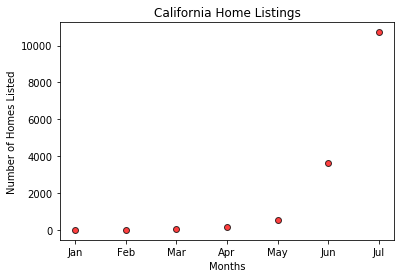

In [20]:
listed_bins = [0, 1, 2, 3, 4, 5, 6, 7]
listed_ranges = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"]


california_listed = finalized_california_data[["id",
                           "posted_year",
                           "posted_month"]]
# california_listings.info()

california_listed["Listings"] = pd.cut(california_listed["posted_month"].astype(int), listed_bins, labels=listed_ranges, include_lowest=True)
california_listed = california_listed.groupby(["Listings"]).count()

california_listed.reset_index(inplace = True)

x_axis = california_listed["Listings"]
y_axis = california_listed["id"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("California Home Listings")
plt.xlabel("Months")
plt.ylabel("Number of Homes Listed")


# plt.savefig('California_listings_timeline.png')

plt.show()

In [15]:
california_listed

,Listings,id,posted_year,posted_month
0,Jan,18,18,18
1,Feb,35,35,35
2,Mar,72,72,72
3,Apr,162,162,162
4,May,529,529,529
5,Jun,3639,3639,3639
6,Jul,10718,10718,10718


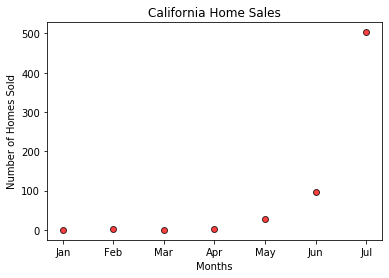

In [21]:
sold_bins = [0, 1, 2, 3, 4, 5, 6, 7]
sold_ranges = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"]

california_sold = california_homes_9.loc[california_homes_9["event"]== "Sold"]

california_sold = california_sold[["id",
                           "posted_year",
                           "posted_month"]]
# california_listings.info()

california_sold["Listings"] = pd.cut(california_sold["posted_month"].astype(int), sold_bins, labels=sold_ranges, include_lowest=True)
california_sold = california_sold.groupby(["Listings"]).count()

california_sold.reset_index(inplace = True)

x_axis = california_sold["Listings"]
y_axis = california_sold["id"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("California Home Sales")
plt.xlabel("Months")
plt.ylabel("Number of Homes Sold")


# plt.savefig('California_sales_timeline.png')

plt.show()

In [25]:
california_sold

,Listings,id,posted_year,posted_month
0,Jan,1,1,1
1,Feb,2,2,2
2,Mar,0,0,0
3,Apr,2,2,2
4,May,27,27,27
5,Jun,96,96,96
6,Jul,503,503,503
